<a href="https://colab.research.google.com/github/happylittle7/TAICA_Generative-AI-Text-and-Image-Synthesis-Principles-and-Practice/blob/main/NTNU_41247032S_%E8%B3%87%E5%B7%A5116_%E5%90%B3%E4%BF%8A%E5%BB%B7_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1 讀入套件

先一樣讀入一些基本的套件，因為最後的使用者介面是Web app，會用到Gradio，故在這邊先用pip安裝。

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


接著安裝老師在上課時提到的基本四件套

In [2]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

## STEP 2 讀入資料集

讀取上課提到的MNIST資料集，把它存到程式裡

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## STEP 3 檢查資料及內容

利用老師上課寫好的函式 show_xy 來確認讀到的資料是不是符合我們的預期。

In [4]:
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(X, cmap = 'Greys')
    print(f'本資料 y 給定的答案為: {y_train[n]}')

In [5]:
interact_manual(show_xy, n=(0,59999));

interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

可以看到對於每筆n，存到的都有對應不同的手寫數字資料

## STEP 4 把資料進行 reshape
因為我們現在要用的標準神經網路只能吃「平平的」資料，所以先用reshape對資料進行預處理（轉成784長的向量形式）


In [6]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

## STEP 5 對資料進行 one-hot encoding
因為０~9是有有序、連續性的，為了避免其干擾到我們對手寫數字辨識的訓練，我們對其進行one-hot encoding

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

試著來看轉換過後的資料，可以發現資料真的被 one hot-encoding 了

In [8]:
n = 3
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

## STEP 6 建構神經網路

我打算使用Sequential一層一層新增神經元。

In [9]:
model = Sequential()

我先試著將原本上課的模型層數、神經元個數加多

In [10]:
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## STEP 7 組裝神經網路

在這邊 loss function, 一樣選擇 `mse`，optimizer, 同樣使用標準的 SGD ， 設 learning rate 為 0.1。

本次試驗觀察如果每層神經元數、層數變多，對最終結果是否有明顯影響。

In [11]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])

## 4. STEP 8 確認神經元架構

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,674 (5.56 MB)

 Trainable params: 1,457,674 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

## STEP 9 訓練神經網路

這次以batch_size=100，跑10次迭代進行訓練，並且把過程記錄下來，方便等等分析，另外將測試資料且十分之二作為驗證集。

In [13]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.2)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1337 - loss: 0.0897 - val_accuracy: 0.4446 - val_loss: 0.0876
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4691 - loss: 0.0858 - val_accuracy: 0.5195 - val_loss: 0.0717
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5930 - loss: 0.0615 - val_accuracy: 0.8361 - val_loss: 0.0325
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8367 - loss: 0.0295 - val_accuracy: 0.8837 - val_loss: 0.0192
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8820 - loss: 0.0195 - val_accuracy: 0.9013 - val_loss: 0.0154
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9005 - loss: 0.0160 - val_accuracy: 0.9122 - val_loss: 0.0137
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9080 - loss: 0.0143 - val_accuracy: 0.9180 - val_loss: 0.0125
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9169 - loss: 0.0130 - val_accuracy: 0.

## STEP 10 評估結果



In [14]:
loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率 {acc*100:.2f}%")
print('loss:', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9203 - loss: 0.0125
測試資料正確率 93.11%
loss: 0.010779611766338348


在這邊將訓練過程視覺化，更清楚訓練時模型的表現。

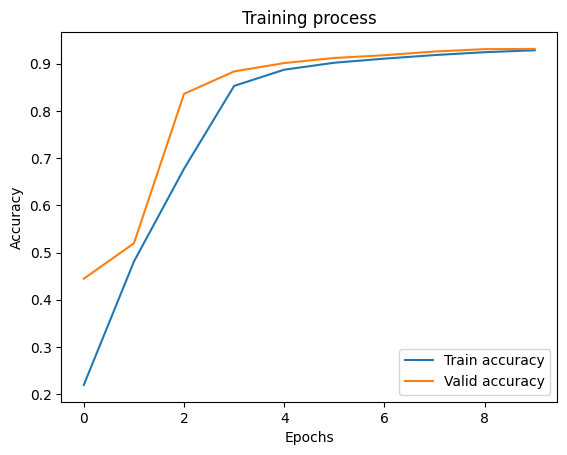

In [15]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training process')
plt.show()

在做這份作業時，可以發現正確率比範例程式碼的正確率（0.8952999711036682）高，故看起來調大神經元數和層數是個可以深究的策略。

##STEP 11 用 Gradio 來展示
這邊是方便自己可以快速做測試。

In [16]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [17]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [18]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4f5f13983b049148e1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4f5f13983b049148e1.gradio.live


## STEP 12 建構、訓練模型 2
我後來去翻書，另外嘗試做了另一個模型，中間用到了一些新的方式：


*   Dropout：避免over fitting，模仿人類學習那樣沒辦法百分之百吸收的效果
*   LeakyReLU： 和老師使用的ReLU激活函數不一樣。如果使用ReLU的話，當輸入值為負時，它的輸出永遠是 0，這樣會導致神經元永遠不更新權重。因此採用LeakyReLU，他的負數區域允許一些小的梯度（α=0.1），這樣可以讓梯度流動。


In [23]:
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.3))


model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(x_train, y_train, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5204 - loss: 1.3647 - val_accuracy: 0.9187 - val_loss: 0.2760
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8765 - loss: 0.4372 - val_accuracy: 0.9456 - val_loss: 0.1906
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9179 - loss: 0.3132 - val_accuracy: 0.9553 - val_loss: 0.1555
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.2581 - val_accuracy: 0.9627 - val_loss: 0.1341
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9390 - loss: 0.2246 - val_accuracy: 0.9638 - val_loss: 0.1240
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9476 - loss: 0.1995 - val_accuracy: 0.9665 - val_loss: 0.1175
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9508 - loss: 0.1889 - val_accuracy: 0.9688 - val_loss: 0.1163
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9561 - loss: 0.1646 - val_accu

In [25]:
loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率 {acc*100:.2f}%")
print('loss:', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.1011
測試資料正確率 98.26%
loss: 0.08335654437541962


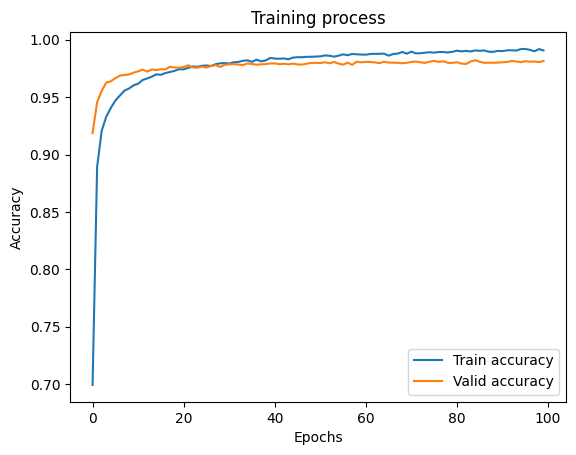

In [26]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training process')
plt.show()

經過訓練後，可以發現準確性有大幅上升，訓練大約在第20次迭代後正確性即差不多固定。